In [17]:
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib
import re

In [19]:
train_test="train_data.txt"
train_data = []
with open(train_test, "r") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            train_data.append(parts)

df_train = pd.DataFrame(train_data, columns=["ID", "Title_Year", "Genre", "Plot"])
df_train.head()


,ID,Title_Year,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [20]:
print(df_train.isnull().sum())
print(df_train.nunique())

ID            0
Title_Year    0
Genre         0
Plot          0
dtype: int64
ID            54214
Title_Year    54214
Genre            27
Plot          54086
dtype: int64


In [21]:
df_train = df_train.drop(columns=["ID", "Title_Year"])

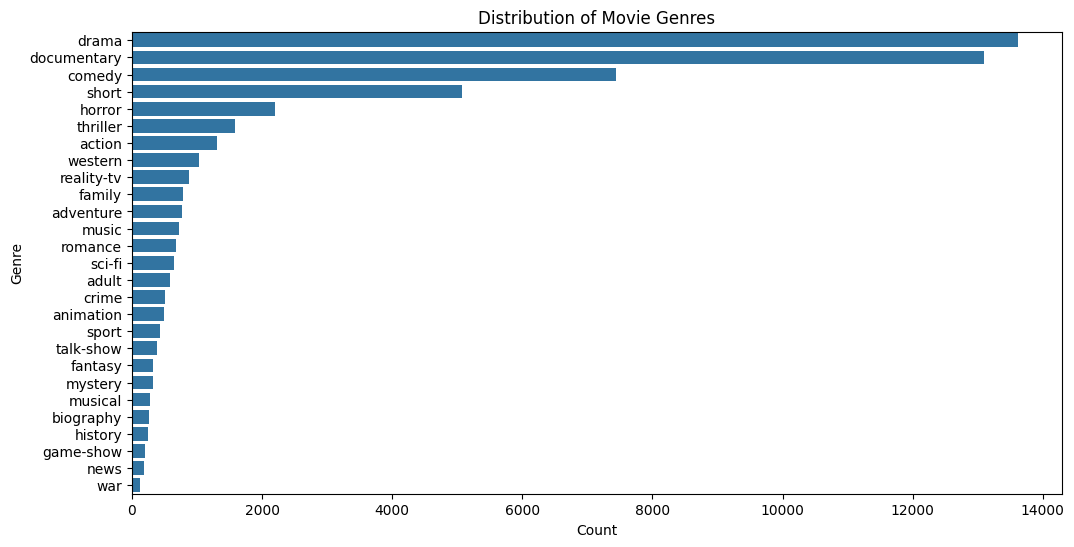

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_train["Genre"], order=df_train["Genre"].value_counts().index)
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train["Plot"], df_train["Genre"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(df_test["Plot"])  

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_acc = accuracy_score(y_val, nb_model.predict(X_val_tfidf))

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
lr_acc = accuracy_score(y_val, lr_model.predict(X_val_tfidf))

svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)
svm_acc = accuracy_score(y_val, svm_model.predict(X_val_tfidf))

# Compare model performance
model_scores = {
    "Naive Bayes": nb_acc,
    "Logistic Regression": lr_acc,
    "SVM": svm_acc
}
best_model_name = max(model_scores, key=model_scores.get)
print(f"Best Model: {best_model_name} with Accuracy: {model_scores[best_model_name]:.2f}")

best_model = {"Naive Bayes": nb_model, "Logistic Regression": lr_model, "SVM": svm_model}[best_model_name]


Best Model: SVM with Accuracy: 0.59


In [ ]:

joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Best model and vectorizer saved successfully!")


Best model and vectorizer saved successfully!


In [ ]:

best_model = joblib.load("best_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [ ]:
train_test="test_data.txt"
with open(train_test, "r") as files:
    test_data = []
    for line in files:
        parts = line.strip().split(" ::: ")
        if len(parts) == 3:
            movie_id, title, description = parts
            test_data.append((movie_id, title, description))

df_test = pd.DataFrame(test_data, columns=["ID", "Title", "Plot"])

In [ ]:

X_test_tfidf = vectorizer.transform(df_test["Plot"])

df_test["Predicted Genre"] = best_model.predict(X_test_tfidf)


df_test[["Title", "Predicted Genre"]].to_csv("test_predictions.csv", index=False)
print("Predictions saved to 'test_predictions.csv'!")

print(df_test[["Title", "Predicted Genre"]])


Predictions saved to 'test_predictions.csv'!
                                Title Predicted Genre
0                Edgar's Lunch (1998)          comedy
1            La guerra de papá (1977)           drama
2         Off the Beaten Track (2010)     documentary
3              Meu Amigo Hindu (2015)           drama
4                   Er nu zhai (1955)           drama
...                               ...             ...
54195  "Tales of Light & Dark" (2013)           drama
54196     Der letzte Mohikaner (1965)          action
54197             Oliver Twink (2007)          comedy
54198               Slipstream (1973)          comedy
54199       Curitiba Zero Grau (2010)     documentary

[54200 rows x 2 columns]


In [31]:

df_train["Word_Count"] = df_train["Plot"].apply(lambda x: len(x.split()))
print("Word Count Statistics:")
print("Mean:", np.mean(df_train["Word_Count"]))
print("Median:", np.median(df_train["Word_Count"]))
print("Std Dev:", np.std(df_train["Word_Count"]))


Word Count Statistics:
Mean: 101.90738554616888
Median: 79.0
Std Dev: 76.57848592787713


C:\Users\rolka\AppData\Local\Temp\ipykernel_7972\1710712503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_train["Genre"], order=df_train["Genre"].value_counts().index, palette="coolwarm")


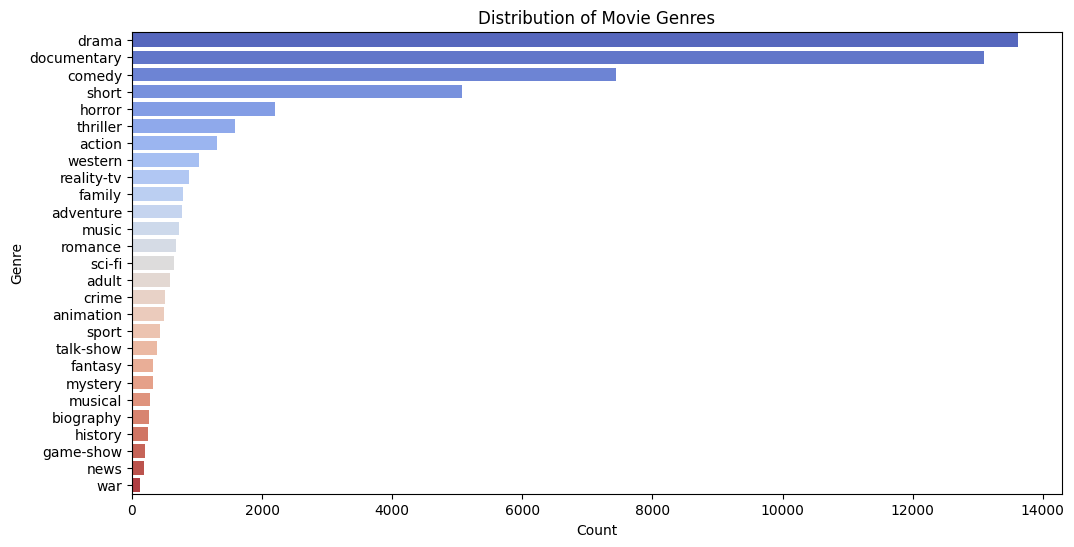

In [32]:

plt.figure(figsize=(12, 6))
sns.countplot(y=df_train["Genre"], order=df_train["Genre"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


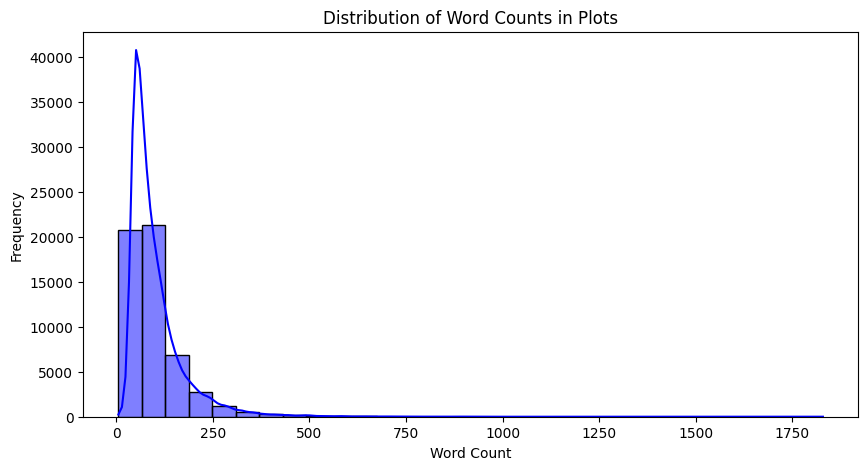

In [33]:

plt.figure(figsize=(10, 5))
sns.histplot(df_train["Word_Count"], bins=30, kde=True, color="blue")
plt.title("Distribution of Word Counts in Plots")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()
